# **Análisis de Sentimiento y Modelos de Clasificación para Determinar su Generalización en Yelp**

# **I. Análisis de Sentimiento con VADER**

# **I.1 Cargamos datasets y exploramos las columnas de los mismos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Otros/yelp_review_florida.csv')

In [4]:
df.iloc[0]

review_id                                 rGQRf8UafX7OTlMNN19I8A
user_id                                   1WHRWwQmZOZDAhp2Qyny4g
business_id                               uMvVYRgGNXf5boolA9HXTw
stars_x                                                        5
useful                                                         2
funny                                                          0
cool                                                           0
text           My experience with Shalimar was nothing but wo...
date                                                  2015-06-21
time                                                    14:48:06
Name: 0, dtype: object

In [5]:
df.shape

(821793, 10)

In [6]:
df['text'].iloc[0]

"My experience with Shalimar was nothing but wonderful. \nI wanted to get my engagement ring sized and was told over the phone that it could probably be done within the day. \nWhen I brought it by, the team confirmed that the jeweler would be able to accommodate my same-day request and that it would be around $40 (simple band, decrease by three full sizes).\nI checked my size one more time, confirmed, and left to let them do their thing.\nWhen I came to pick up later that afternoon, the ring was too small. It's very important to note that Shalimar sized the ring perfectly, but that I made a mistake and should've gone up a half-size.\nThe Shalimar group were completely understanding and accommodating, even resizing my ring back up and getting it back to me within an hour at no charge! Even though it was my mistake!\nThe associates' attitudes in dealing with what was a pretty embarrassing situation instantly earned my satisfaction and loyalty as a customer. Very grateful for such a wonde

In [7]:
df_b = pd.read_csv('/content/drive/MyDrive/Otros/yelp_business_florida_final.csv')

<ipython-input-7-68adbb6e9bf0>:1: DtypeWarning: Columns (5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv('/content/drive/MyDrive/Otros/yelp_business_florida_final.csv')


In [8]:
df_b.iloc[0]

business_id                   qkRM_2X51Yqxk3btlwAQIg
name                                  Temple Beth-El
address                           400 Pasadena Ave S
city                                  St. Petersburg
state                                             FL
postal_code                                  33707.0
latitude                                    27.76659
longitude                                 -82.732983
stars                                            3.5
review_count                                       5
is_open                                            1
RestaurantsPriceRange2                     sin datos
BusinessAcceptsCreditCards                 sin datos
RestaurantsReservations                    sin datos
GoodForKids                                sin datos
RestaurantsDelivery                        sin datos
OutdoorSeating                             sin datos
Alcohol                                    sin datos
RestaurantsGoodForGroups                   sin

In [9]:
df_b.shape

(33756, 35)

In [10]:
df_ml = df.merge(df_b, on='business_id' )# Queremos solo aquellos registros que estan en ambas tablas. how='left', 'inner'

In [11]:
df_ml.shape

(821793, 44)

In [12]:
df_ml.dropna()
df_ml.drop_duplicates()

,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,time,...,upscale,classy,casual,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,rGQRf8UafX7OTlMNN19I8A,1WHRWwQmZOZDAhp2Qyny4g,uMvVYRgGNXf5boolA9HXTw,5,2,0,0,My experience with Shalimar was nothing but wo...,2015-06-21,14:48:06,...,sin datos,sin datos,sin datos,16:0-21:30,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:30,11:0-22:30,11:0-21:0
1,A0uKELjTgN7Z-MW1Z1iNfQ,DsginnZpaPWTSYmsHCdmeg,uMvVYRgGNXf5boolA9HXTw,4,3,0,0,"Very helpful and patient. 20"" 14k gold chain ...",2013-06-05,22:23:51,...,sin datos,sin datos,sin datos,16:0-21:30,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:30,11:0-22:30,11:0-21:0
2,vWYzuU5KBgEfdygwigfkPQ,pNFCL2IPCjFm6Uw-aZ5wYQ,uMvVYRgGNXf5boolA9HXTw,5,0,0,0,They were all very easy to work with and went ...,2017-02-22,01:24:28,...,sin datos,sin datos,sin datos,16:0-21:30,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:30,11:0-22:30,11:0-21:0
3,ApTBT96Jo8NgPDkRbmOdyA,-YIELPJVr-MgU4FDh5Gb5w,uMvVYRgGNXf5boolA9HXTw,1,0,0,0,They have forever lost my business. Ordered a ...,2021-04-22,22:37:27,...,sin datos,sin datos,sin datos,16:0-21:30,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:30,11:0-22:30,11:0-21:0
4,H7QI9u4ffsq_sTDxIudmpg,sJnQlap6DMhdJKzUTAGB5Q,uMvVYRgGNXf5boolA9HXTw,1,0,0,0,please dont go here they have bullshit gold th...,2020-10-06,17:37:51,...,sin datos,sin datos,sin datos,16:0-21:30,16:0-21:30,16:0-21:30,16:0-21:30,16:0-22:30,11:0-22:30,11:0-21:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821788,0rYbKSGOHAwqw_AaaA54cA,tlPAas-fI2Xs7ZQ4_VO4Sw,umg_M7rIoVccsxqoWAF3BA,1,2,0,0,I can't even express how much I hate these apa...,2018-09-09,18:24:38,...,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos
821789,-8Wp1uK0DU3UQrPV415j2g,_Vv-gftKARJOqSYlEP2KNw,umg_M7rIoVccsxqoWAF3BA,1,4,0,0,the worst apartments i have ever lived in.... ...,2013-09-10,14:57:57,...,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos
821790,I-4Tlc3TBVO6FV91RLFMMA,ZiKyPlfpnr6yhJtJxxXSyg,umg_M7rIoVccsxqoWAF3BA,1,0,0,0,Worst apartment I've ever lived in. There is n...,2021-03-08,03:22:27,...,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos
821791,seKKoIl5aQuNIN9wAipvpA,O-dGSO_felAqEdVmIEtTXg,umg_M7rIoVccsxqoWAF3BA,1,0,0,0,"COMPLETE NIGHTMARE- as an ARMY VET, I am disgu...",2021-05-11,23:17:00,...,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos,sin datos


In [13]:
df_ml.iloc[0]

review_id                                                rGQRf8UafX7OTlMNN19I8A
user_id                                                  1WHRWwQmZOZDAhp2Qyny4g
business_id                                              uMvVYRgGNXf5boolA9HXTw
stars_x                                                                       5
useful                                                                        2
funny                                                                         0
cool                                                                          0
text                          My experience with Shalimar was nothing but wo...
date                                                                 2015-06-21
time                                                                   14:48:06
name                                                     Shalimar Fine Jewelers
address                                                       250 Westshore Plz
city                                    

Columnas que utilizaremos: 'business_id', 'stars_x', 'city', 'state' y 'text'

In [14]:
df_ml = df_ml[['business_id','stars_x','city','state','text']]

In [15]:
df_ml['length'] = df_ml['text'].apply(len)
df_ml.head()

,business_id,stars_x,city,state,text,length
0,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,My experience with Shalimar was nothing but wo...,1009
1,uMvVYRgGNXf5boolA9HXTw,4,Tampa,FL,"Very helpful and patient. 20"" 14k gold chain ...",106
2,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,They were all very easy to work with and went ...,334
3,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,They have forever lost my business. Ordered a ...,921
4,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,please dont go here they have bullshit gold th...,369


In [16]:
df_ml['length'].describe()

count    821793.000000
mean        541.498714
std         512.427290
min           1.000000
25%         215.000000
50%         380.000000
75%         682.000000
max        5000.000000
Name: length, dtype: float64

# **I.2 Creamos histogramas, instalamos dependencias necesarias, etiquetamos la columna compound y obtenemos insights del análisis de sentimientos**

## Histograma 1: Numero de caracteres por registro

<Axes: ylabel='Frequency'>

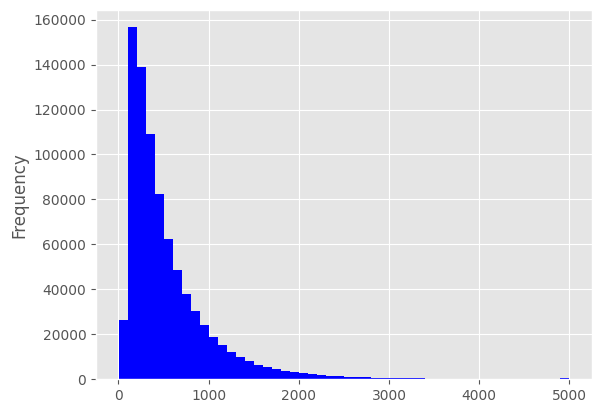

In [17]:
df_ml['length'].plot(bins=50, kind='hist', color='Blue')

Este gráfico nos permite ver cuantas palabras hay por registro, lo que tambien nos brinda un rango del numero de palabras que deberiamos considerar para posteriores evaluaciones, por ejemplo para "max_features" seria razonable considerar hasta 2000 o 2500 palabras como las mas frecuentes, de ese modo estariamos cubriendo aquellos registros con un menor numero de palabras y se estaria delimitando las palabras mas frecuentes de acuerdo a este grafico.

In [18]:
df_ml = df_ml.copy()

In [19]:
df_ml.iloc[0]

business_id                               uMvVYRgGNXf5boolA9HXTw
stars_x                                                        5
city                                                       Tampa
state                                                         FL
text           My experience with Shalimar was nothing but wo...
length                                                      1009
Name: 0, dtype: object

In [20]:
df_ml['stars_x'].value_counts().sort_index()

1    131120
2     58926
3     74065
4    156677
5    401005
Name: stars_x, dtype: int64

## Histograma 2: Número de reviews por estrellas

<Axes: title={'center': 'Count of Reviews by Starts'}>

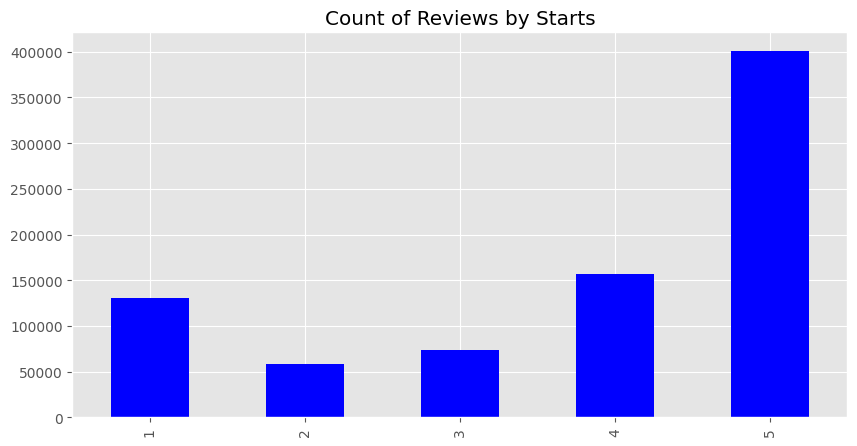

In [21]:
df_ml['stars_x'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Starts',
                                                  figsize=(10,5), color='Blue')

## Instalamos dependencias para realizar el preprocesamiento de la columna 'text' y realizar el analisis de sentimiento.

In [22]:
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

#tokenized = nltk.word_tokenize(sample)
#tokenized[:5]
#tagged = nltk.pos_tag(tokenized)
#tagged[:5]
#sentences = nltk.chunk.ne_chunk(tagged)
#sentences.pprint()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

** tqdm ayuda a crear barras de progreso para el procesamiento de datos, entrenar modelos ML, funciones multi-loop y descargar datos de internet.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [24]:
# Creamos nuestra funcion.
senia = SentimentIntensityAnalyzer()

In [25]:
# Creamos nuestra muestra de una registro para probar el modelo VADER
sample = df_ml['text'].iloc[36]
sample

'Awesome food, fantastic waitress!  I had the southern fried steak breakfast... delicious!  Reasonably priced, clean and friendly, a down home country diner feel!'

In [26]:
senia.polarity_scores(sample)

{'neg': 0.0, 'neu': 0.468, 'pos': 0.532, 'compound': 0.9594}

In [27]:
# Cuando es necesario por temas de RAM "truncamos los registros".
# Asumiendo que nuestra poblacion es 821793 datos, solo consideraremos alrededor del 10% de este.
df_ml = df_ml[:83000]

In [28]:
df_ml.drop_duplicates()

,business_id,stars_x,city,state,text,length
0,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,My experience with Shalimar was nothing but wo...,1009
1,uMvVYRgGNXf5boolA9HXTw,4,Tampa,FL,"Very helpful and patient. 20"" 14k gold chain ...",106
2,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,They were all very easy to work with and went ...,334
3,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,They have forever lost my business. Ordered a ...,921
4,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,please dont go here they have bullshit gold th...,369
...,...,...,...,...,...,...
82995,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,My boyfriend and I took his parents here on a ...,414
82996,_0QZGrg91aaiMhh7tQyYYg,5,Tampa,FL,I've been coming to Jackson's for YEARS and it...,254
82997,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,The ambiance and Bay view is exceptional! I ha...,539
82998,_0QZGrg91aaiMhh7tQyYYg,1,Tampa,FL,The buffet only brunch isn't really an attract...,486


In [29]:
# Necesitamos una nueva columna de indices y resetear los indices.
df_ml = df_ml.rename_axis('id', axis=1)
#df_ml

df_ml = df_ml.reset_index().rename(columns={'index':'id'})
#df_ml.head(3)

## Aplicamos VADER a toda la columna

In [30]:
# Usamos una funcion para iterar en cada celda(fila) de la columna text.

res = {}
for i, row in tqdm(df_ml.iterrows(), total=len(df_ml)):
  text = row['text']
  theid = row['id']
  res[theid] = senia.polarity_scores(text)

  0%|          | 0/83000 [00:00<?, ?it/s]

## Hacemos un join de los resultados con la tabla df_ml

In [31]:
# Usamos la transpuesta para conseguir el formato de tabla deseado y luego realizar un merge.
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
0,0.100,0.752,0.148,0.9181
1,0.000,0.860,0.140,0.4754
2,0.000,0.722,0.278,0.9688
3,0.009,0.841,0.151,0.9726
4,0.101,0.772,0.127,-0.0176
...,...,...,...,...
82995,0.000,0.815,0.185,0.9523
82996,0.000,0.852,0.148,0.7655
82997,0.014,0.727,0.259,0.9840
82998,0.077,0.897,0.026,-0.4340


In [32]:
vaders = vaders.reset_index().rename(columns={'index':'id'})

In [33]:
merged_vader = pd.merge(df_ml, vaders, on='id', how='inner')

In [34]:
merged_vader

,id,business_id,stars_x,city,state,text,length,neg,neu,pos,compound
0,0,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,My experience with Shalimar was nothing but wo...,1009,0.100,0.752,0.148,0.9181
1,1,uMvVYRgGNXf5boolA9HXTw,4,Tampa,FL,"Very helpful and patient. 20"" 14k gold chain ...",106,0.000,0.860,0.140,0.4754
2,2,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,They were all very easy to work with and went ...,334,0.000,0.722,0.278,0.9688
3,3,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,They have forever lost my business. Ordered a ...,921,0.009,0.841,0.151,0.9726
4,4,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,please dont go here they have bullshit gold th...,369,0.101,0.772,0.127,-0.0176
...,...,...,...,...,...,...,...,...,...,...,...
82995,82995,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,My boyfriend and I took his parents here on a ...,414,0.000,0.815,0.185,0.9523
82996,82996,_0QZGrg91aaiMhh7tQyYYg,5,Tampa,FL,I've been coming to Jackson's for YEARS and it...,254,0.000,0.852,0.148,0.7655
82997,82997,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,The ambiance and Bay view is exceptional! I ha...,539,0.014,0.727,0.259,0.9840
82998,82998,_0QZGrg91aaiMhh7tQyYYg,1,Tampa,FL,The buffet only brunch isn't really an attract...,486,0.077,0.897,0.026,-0.4340


## Etiquetamos los resultados generados por VADER

En la columna compound los valores mayores a 0 son feedback positivos(1) y los valores menores o iguales a cero son feedbacks negativos (0).

In [35]:
#merged_vader['feedback'] = 0

merged_vader.loc[merged_vader['compound'] > 0.0000, 'feedback'] = 1

merged_vader.loc[merged_vader['compound'] <= 0.0000, 'feedback'] = 0

In [36]:
merged_vader = merged_vader.copy()
merged_vader

,id,business_id,stars_x,city,state,text,length,neg,neu,pos,compound,feedback
0,0,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,My experience with Shalimar was nothing but wo...,1009,0.100,0.752,0.148,0.9181,1.0
1,1,uMvVYRgGNXf5boolA9HXTw,4,Tampa,FL,"Very helpful and patient. 20"" 14k gold chain ...",106,0.000,0.860,0.140,0.4754,1.0
2,2,uMvVYRgGNXf5boolA9HXTw,5,Tampa,FL,They were all very easy to work with and went ...,334,0.000,0.722,0.278,0.9688,1.0
3,3,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,They have forever lost my business. Ordered a ...,921,0.009,0.841,0.151,0.9726,1.0
4,4,uMvVYRgGNXf5boolA9HXTw,1,Tampa,FL,please dont go here they have bullshit gold th...,369,0.101,0.772,0.127,-0.0176,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
82995,82995,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,My boyfriend and I took his parents here on a ...,414,0.000,0.815,0.185,0.9523,1.0
82996,82996,_0QZGrg91aaiMhh7tQyYYg,5,Tampa,FL,I've been coming to Jackson's for YEARS and it...,254,0.000,0.852,0.148,0.7655,1.0
82997,82997,_0QZGrg91aaiMhh7tQyYYg,4,Tampa,FL,The ambiance and Bay view is exceptional! I ha...,539,0.014,0.727,0.259,0.9840,1.0
82998,82998,_0QZGrg91aaiMhh7tQyYYg,1,Tampa,FL,The buffet only brunch isn't really an attract...,486,0.077,0.897,0.026,-0.4340,0.0


In [37]:
#merged_vader.drop(columns=['state','text','length'], inplace=True)
#merged_vader.to_csv('/content/drive/MyDrive/Otros/yelp_review_analisis_sentimiento.csv')

# Histograma 3: Distribucion de Etiquetas por Numero de Caracteres

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

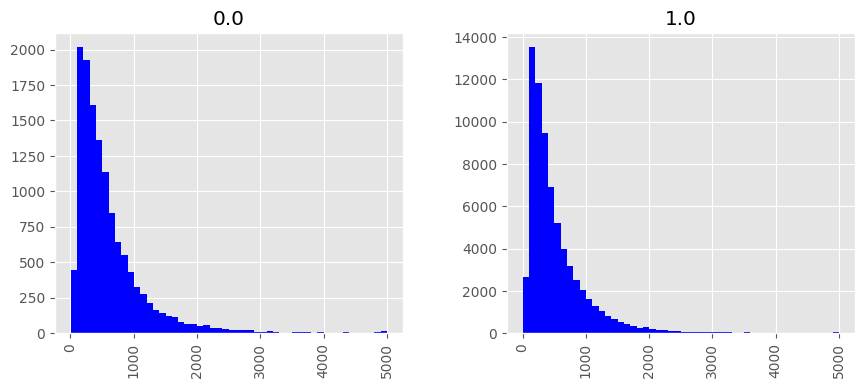

In [38]:
merged_vader.hist(column='length', by='feedback', bins=50, figsize=(10,4), color='Blue')

1. Hay un gran numero de opiniones expresadas con menos del 1000 caracteres tanto en opiniones positivas como negativas.
2. El numero de registros con opiniones favorables(1) es mucho mayor que el de registros desfavorables(0).
3. Del histograma podemos colegir que las etiquetas (0 y 1) estan desbalanceadas, esto nos da una pista de una posible evaluacion del modelo mediante cross validation.

In [39]:
city_scores = merged_vader.groupby('city')['compound'].mean().reset_index()

city_scores = city_scores.sort_values(by='compound', ascending=False)

city_scores.head(10)

,city,compound
0,Belleair,0.943433
1,Belleair Bluffs,0.868437
24,St. Pete Beach,0.758906
27,Tarpon Springs,0.747106
29,Treasure Island,0.714310
12,Mulberry,0.706831
14,North Redington Beach,0.701337
25,St. Petersburg,0.690721
20,Redington Shores,0.687906
5,Dunedin,0.686607


# Histograma 4: Relacion entre score compound y stars

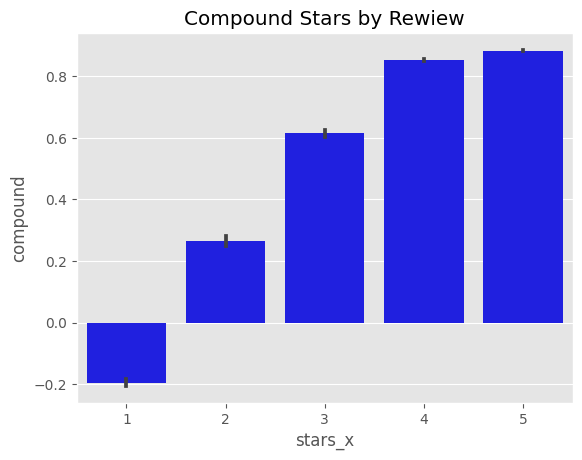

In [40]:
ax = sns.barplot(data=merged_vader, x='stars_x', y='compound', color='Blue')
ax.set_title("Compound Stars by Rewiew")
plt.show()

La relacion que encontramos es positiva, ya que a medida que el numero de estrellas de un restaurante aumenta el score compound lo hace tambien.

Lo anterior implica que si un restaurant tiene 5 estrellas es mas posible que tenga mejor aceptacion o comentarios positivos.

# Histograma 5: Relacion entre stars y scores (positive, neutral y negative)

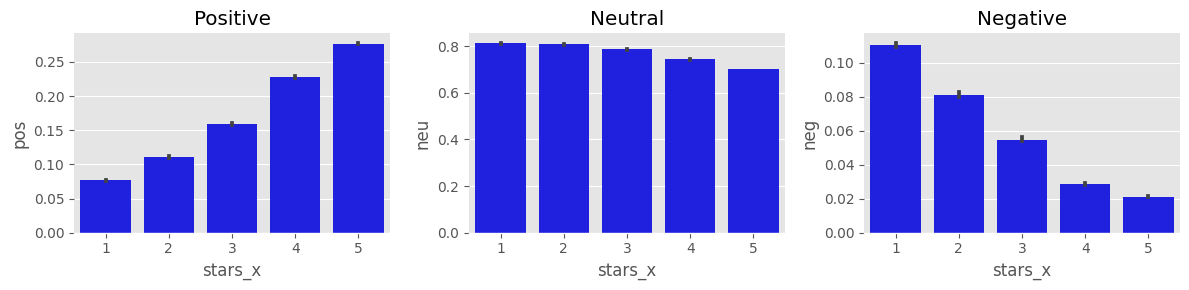

In [41]:
palettese = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD"]

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.set_palette(palettese)
sns.barplot(data=merged_vader, x='stars_x', y='pos', ax=axs[0], color='Blue')
sns.barplot(data=merged_vader, x='stars_x', y='neu', ax=axs[1], color='Blue')
sns.barplot(data=merged_vader, x='stars_x', y='neg', ax=axs[2], color='Blue')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

sns.despine(left=True, right=True)
plt.tight_layout()
plt.show()

La relacion entre stars y score positivo es directa. Mas estrellas mayores comentarios positivos.

La relacion entre stars y score negative es inversa. Mas extrellas menores comentarios negativos.

De acuerdo al histograma no podemos concluir la relacion entre stars y score neutro.

In [42]:
# Sentimiento positivo: El score mas positivo (vader no esta entrenado para diferenciar el sarcasmo)

# De acuerdo al feedback

merged_vader.query('feedback == 1').sort_values('pos', ascending=False)['text'].values[0]

'Great'

In [43]:
# De acuerdo al stars

merged_vader.query('stars_x == 5').sort_values('pos', ascending=False)['text'].values[0]

'Well prepared, creative, fresh food in a casual fun atmosphere.  Good drinks.  Great prices.'

In [44]:
# Sentimiento negativo: score mas negativo

# De acuerdo a feedback

merged_vader.query('feedback == 0').sort_values('neg', ascending=False)['text'].values[0]

'Much better than Walmart down the street.\n\nZzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz zzz'

In [45]:
# De acuerdo a stars

merged_vader.query('stars_x == 1').sort_values('neg', ascending=False)['text'].values[0]

'We came-we saw-we left :-|\nHorrible! Worst! Smelly! Disgusting!'

# **II. Modelos de Clasificacion**



Preprocesamos los datos

In [46]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import (train_test_split,
                                     #TimeSeriesSplit,
                                     KFold,
                                     StratifiedKFold,
                                     #GroupKFold,
                                     #StratifiedGroupKFold,
                                     )
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Function para preprocesamiento de la columna text
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

# Preprocesamos todas las filas de columna text con la funcion
corpus = [preprocess_text(text) for text in merged_vader['text']]

# Creamos nuestros datasets para ser alimentados en los modelos
cv = CountVectorizer(max_features=2000) # max_features = 2000 +  ver histograma 1
X = cv.fit_transform(corpus).toarray()  # This works like FEATURES!!
y = merged_vader['feedback'].values  # This is my TARGET!



## Dividiendo nuestros datos en datos de entrenamiento (train data) y datos de prueba (holdout_data)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## **II.1 Randomforestclassifier**

In [48]:
# Fit/train/shape the Random Forest classifier to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predict the Test set results
y_pred_randf = classifier.predict(X_test)

In [49]:
# ACCURACY en el modelo de entrenamiento
y_pred_train = classifier.predict(X_train)
y_pred_train_probability = classifier.predict_proba(X_train)[:,1] # Este ultimo termino porque predict_proba da las probabilidades de 0 y 1, queremos el segundo

acc_score = accuracy_score(y_train, y_pred_train)
auc_score = roc_auc_score(y_train, y_pred_train_probability)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del training set  en ACCURACY is: 1.0000 y AUC de  1.0000


In [50]:
# Aplicamos el modelo en la muestra test (COMO SI PUSIERAMOS EN PRODUCCION y TRATARAMOS DE USARLO CON DATOS NUEVOS)

y_pred_test = classifier.predict(X_test)
y_pred_test_probability = classifier.predict_proba(X_test)[:,1] # Este ultimo termino porque predict_proba da las probabilidades de 0 y 1, queremos el segundo


acc_score = accuracy_score(y_test, y_pred_test)
auc_score = roc_auc_score(y_test, y_pred_test_probability)

print(f'El score del test set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del test set  en ACCURACY is: 0.9030 y AUC de  0.9357


In [51]:
# LINEA BASE
# MEDIMOS LA CAPACIDAD DE PREDECIR CEROS Y SU AUC(QUE TAN ACERTADOS SON LAS PREDICCIONES en terminos de probabilidades)
accuracy_score(y_test, np.zeros_like(y_test)), roc_auc_score(y_test, np.zeros_like(y_test))


(0.15656626506024096, 0.5)

El accuracy del modelo test(produccion) es 90.30% mayor q el accuracy de linea base 15.66% y su AUC de 93.57(lo que predice es correcto) es mejor q 0.5(a este nivel predice de manera random) del modelo linea base  por tanto el modelo predice bien en un 90% de los casos.

# **II.1.1 Reporte de classificacion sin cross validation para Randomforestclassifier**
 **accuracy, precision, recall, and F1-score**

In [52]:
# Los y_test funcionan como los verdaderos valores (y_true)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_randf)
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_randf)

# Precision
precision = precision_score(y_test, y_pred_randf)

# Recall
recall = recall_score(y_test, y_pred_randf)

# F1-score
f1 = f1_score(y_test, y_pred_randf)

print(f"Accuracy: {accuracy:0.4f} nivel de predicciones correctas (del total de predicciones).")
print(f"Precision: {precision:0.4f} nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).")
print(f"Recall: {recall:0.4f} nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).")
print(f"F1-score: {f1:0.4f} nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).")

[[ 1302  1297]
 [  313 13688]]
Accuracy: 0.9030 nivel de predicciones correctas (del total de predicciones).
Precision: 0.9134 nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).
Recall: 0.9776 nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).
F1-score: 0.9445 nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).


# **II.1.2 Cross Validation para Randomforestclassifier**

In [53]:
# X e y son NumPy arrays!!
X_d = pd.DataFrame(X) # Convertimos X a DataFrame
y_s = pd.Series(y)  # Convertimos y a Series

# Instanciamos StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
aucs = []

for train_idx, test_idx in skf.split(X_d, y_s):
    X_train = X_d.loc[train_idx]
    y_train = y_s[train_idx]  # Usar y_s como Series aqui

    X_test = X_d.loc[test_idx]
    y_test = y_s[test_idx]  # Usar y_s como Series aqui

    clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
    clf.fit(X_train, y_train)

    # Let's PREDICT on the test set
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)[:, 1]

    acc_score = accuracy_score(y_test, pred)
    auc_score = roc_auc_score(y_test, pred_prob)

    print(f'==========Fold {fold} ==========')
    print(f'Test set ACCURACY: {acc_score:0.4f} and AUC: {auc_score:0.4f}')

    fold += 1
    aucs.append(auc_score)
mean_fold_auc = np.mean(aucs)
print(f'La MEDIA AUC es: {mean_fold_auc:0.4f}')

==========Fold 0 ==========
Test set ACCURACY: 0.9064 and AUC: 0.9415
==========Fold 1 ==========
Test set ACCURACY: 0.9047 and AUC: 0.9364
==========Fold 2 ==========
Test set ACCURACY: 0.9037 and AUC: 0.9358
==========Fold 3 ==========
Test set ACCURACY: 0.9069 and AUC: 0.9419
==========Fold 4 ==========
Test set ACCURACY: 0.9027 and AUC: 0.9355
La MEDIA AUC es: 0.9382


## **II.2 LGBMClassifier**

In [54]:
#pip install lightgbm

In [55]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(n_estimators=100)
clf.fit(X,y)

# let's PREDICT on training set

pred = clf.predict(X_train)
pred_prob = clf.predict_proba(X_train)

[LightGBM] [Info] Number of positive: 70056, number of negative: 12944
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.018569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11716
[LightGBM] [Info] Number of data points in the train set: 83000, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.844048 -> initscore=1.688663
[LightGBM] [Info] Start training from score 1.688663


In [56]:
# We just want to find the probabilities of positive cases (1)

pred_prob = clf.predict_proba(X_train)[:,1]

In [57]:
pred_prob

array([0.764861  , 0.75425627, 0.99169274, ..., 0.99664189, 0.78824495,
       0.08154016])

In [58]:
acc_score = accuracy_score(y_train, pred)
auc_score = roc_auc_score(y_train, pred_prob)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')

El score del training set  en ACCURACY is: 0.9291 y AUC de  0.9638


In [59]:
  # ON TEST SET

pred_t = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:,1]
acc_score = accuracy_score(y_test, pred_t)
auc_score = roc_auc_score(y_test, pred_prob)

print(f'El score del training set  en ACCURACY is: {acc_score:0.4f} y AUC de  {auc_score:0.4f}')



El score del training set  en ACCURACY is: 0.9268 y AUC de  0.9615


Necesitamos compara con una linea de base(Baseline) para ver si el modelo en produccion (modelo aplicado a test set) sigue prediciendo correctamente si asumieramos que tiene que predecir todos los resultados negativos(0,  np.zeros_like(y_test)).

In [60]:
# Linea base

accuracy_score(y_test, np.zeros_like(y_test)), roc_auc_score(y_test, np.zeros_like(y_test))


(0.15596385542168675, 0.5)

Lo que encontramos es que el modelo aplicado a test set tiene un accuracy de 92.68% y el accuracy del modelo linea base tien 15.6% de accuracy lo que permite concluir que el modelo test predice mejor que el de linea base. Esto ultimo demuestra que la prediccion usando LGBM classifier de nuestros targets es bueno.

# **II.2.1 Reporte de classificacion sin cross validation para LGBMCLASSIFIER**

 **accuracy, precision, recall, and F1-score**

In [61]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_t)
print(cm)

y_true = y_test

# Accuracy
accuracy = accuracy_score(y_true, pred_t)

# Precision
precision = precision_score(y_true, pred_t)

# Recall
recall = recall_score(y_true, pred_t)

# F1-score
f1 = f1_score(y_true, pred_t)

print(f"Accuracy: {accuracy:0.4f} nivel de predicciones correctas (del total de predicciones).")
print(f"Precision: {precision:0.4f} nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).")
print(f"Recall: {recall:0.4f} nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).")
print(f"F1-score: {f1:0.4f} nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).")

[[ 1823   766]
 [  449 13562]]
Accuracy: 0.9268 nivel de predicciones correctas (del total de predicciones).
Precision: 0.9465 nivel de identificacion de SÓLO elementos relevantes(de true positive y false positive).
Recall: 0.9680 nivel elementos relevantes seleccionados en la muestra(Dentro de todos los positivos(true positives and false negatives)).
F1-score: 0.9571 nivel de performance del modelo sobre la muestra (1 indica excelente precision y recall del modelo).


# **II.2.2 Cross Validation para LGBMclassifier**

In [62]:
# La muestra es "grande", los target estan muy desbalanceados, por tanto stratified Kfolds

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=529)

skf.split(X, y) # This works as a generator

<generator object _BaseKFold.split at 0x79c2811da880>

In [63]:
X_dl = pd.DataFrame(X)
y_dl = pd.Series(y)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 0
aucs = []

for train_idx, test_idx in skf.split(X_dl, y_dl):
    X_train = X_dl.loc[train_idx]
    y_train = y_dl[train_idx]

    X_test = X_dl.loc[test_idx]
    y_test = y_dl[test_idx]

    clf = lgb.LGBMClassifier(n_estimators=100, force_row_wise=True)
    clf.fit(X_train, y_train)

    # Let's PREDICT on the test set
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)[:, 1]

    acc_score = accuracy_score(y_test, pred)
    auc_score = roc_auc_score(y_test, pred_prob)

    print(f'==========Fold {fold} ==========')
    print(f'Test set ACCURACY: {acc_score:0.4f} and AUC: {auc_score:0.4f}')

    fold += 1
    aucs.append(auc_score)
mean_fold_auc = np.mean(aucs)
print(f'La MEDIA AUC es: {mean_fold_auc:0.4f}')

[LightGBM] [Info] Number of positive: 56044, number of negative: 10356
[LightGBM] [Info] Total Bins 11267
[LightGBM] [Info] Number of data points in the train set: 66400, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.844036 -> initscore=1.688571
[LightGBM] [Info] Start training from score 1.688571
==========Fold 0 ==========
Test set ACCURACY: 0.9223 and AUC: 0.9543
[LightGBM] [Info] Number of positive: 56045, number of negative: 10355
[LightGBM] [Info] Total Bins 11322
[LightGBM] [Info] Number of data points in the train set: 66400, number of used features: 2000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.844051 -> initscore=1.688685
[LightGBM] [Info] Start training from score 1.688685
==========Fold 1 ==========
Test set ACCURACY: 0.9181 and AUC: 0.9514
[LightGBM] [Info] Number of positive: 56045, number of negative: 10355
[LightGBM] [Info] Total Bins 11314
[LightGBM] [Info] Number of data points in the train set: 66400, number of used features

In [64]:
np.mean(aucs)

0.9512677060105041

# **III. Conclusiones:**

La mayoria de opiniones acerca de restaurants son expresadas con 2000 palabras o menos y la mayoria de opiniones son positivas en 4 de 5 categorias de stars por compound score (ver histograma 1,2 y 4).

Una vez realizada la etiquetacion de los resultados de compound de VADER, se puede notar el desbalance de casos positivos (1) y casos negativos (0), lo que sesga la capacidad de prediccion de un modelo de clasificacion (ver histograma 3).

Se comprueba la relacion directa que existe (de uno a uno) entre el score compound de Vader, la relacion directa entre el score positivo, la relacion inversa entre score negativo y el rating del restaurant respectivamente (ver histograma 4 y 5).Por ejemplo, si el restaurant tiene numero de estrellas de 1 es mas probable que tenga una mala percepcion o resultado negativo en el analisis de sentimiento.

Los comentarios u opiniones(positivas o negativas) en Yelp son mas positivas en su mayoria que en Googlemaps, por ejemplo, solo restaurants de una estrella tienen comentarios negativos, en tanto lo demas todos tienen comentarios positvos.

De los modelos de clasificacion usados sin realizar validacion cruzada el score de accuracy es de un 91% en promedio y el AUC promedio de 95%. Despues de realizar la validacion cruzada en promedio(teniendo en cuenta los dos modelos) se obtiene un accuracy de 90% y un AUC de 95%. Lo anterior permite concluir que si pusieramos en produccion el modelo de machine learning para predecir comentarios positivos y negativos de acuerdo a Vader, este ultimo va a producir(asignar scores positivos) un 90% de outputs correctos (opiniones que realmente son positivas) y tendra un 7%  de error en asignar scores(positivos) a los comentarios.

Comparando los resultados de yelp con los de google en terminos de accuracy, google presenta un mejor grado de prediccion de opiniones positivas en lo que respecta al valor al que un empresario/ cliente de restaurant podria acceder haciendo uso de los servicios de un restaurant. Los histogramas de ambos en cuanto al rating/stars por score compound muestran que en googlemaps se puede tener un mayor acceso a opiniones negativas tanto como positivas, lo que permite contrastar mejor que tipo de restaurants podrian ofrecer un mayor valor a los clientes y esto mismo podria ser usado para determinar mejoras en el servicio con otros datos complementarios.